# Mileage Prediction

This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute.  The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

## Importing Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset and getting basic information about it

In [97]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [98]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [99]:

df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## Data Preprocessing

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [101]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [102]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [103]:
df1=df[df.columns[:6]]

In [104]:
df1=df1.drop('cylinders',axis=1)

In [105]:
df1.corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.804203,-0.778427,-0.831741,0.420289
displacement,-0.804203,1.000000,0.897257,0.932824,-0.543684
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.831741,0.932824,0.864538,1.000000,-0.417457
acceleration,0.420289,-0.543684,-0.689196,-0.417457,1.000000


## Removing Missing Values

In [106]:
df1.isnull().sum()

mpg             0
displacement    0
horsepower      6
weight          0
acceleration    0
dtype: int64

In [107]:
df1.dropna(inplace=True)

In [108]:
df1.shape

(392, 5)

## Data Visualisation

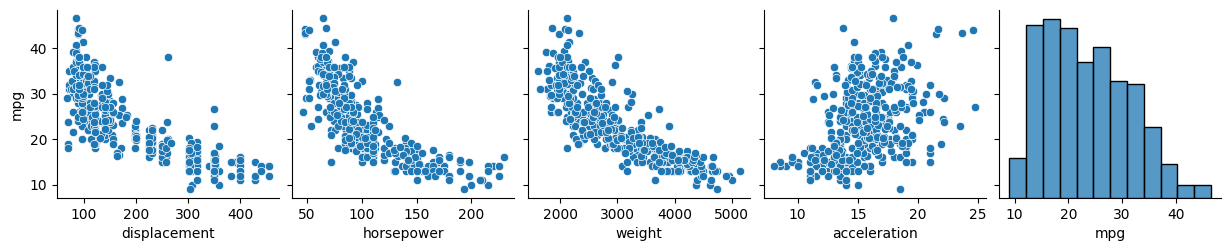

In [109]:
sns.pairplot(df1,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

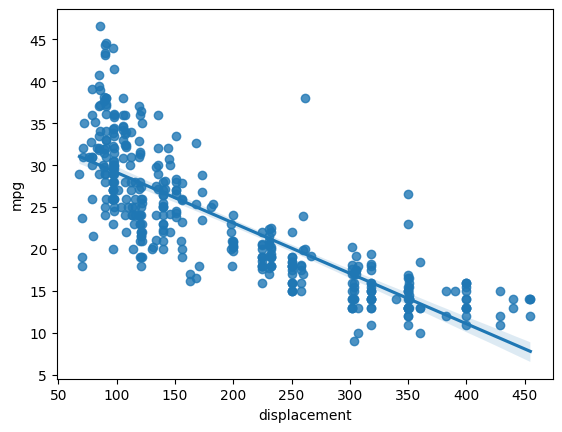

In [110]:
sns.regplot(x='displacement',y='mpg',data=df1)

## Defining Target Variable y and Independent features X

In [111]:
df1.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [112]:
y=df1['mpg']

In [113]:
X=df1.drop('mpg',axis=1)

In [114]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [115]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [116]:
X.shape

(392, 4)

In [117]:
y.shape

(392,)

## Scaling the Data

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [119]:
X=scaler.fit_transform(X)

In [120]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [121]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## Train-Test split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

## Linear Regression model

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr=LinearRegression()

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
lr.intercept_

23.725139778636965

In [129]:
lr.coef_

array([-1.04061664, -2.14102322, -4.02858566, -0.14389381])

## Predicting Test Data

In [130]:
y_pred=lr.predict(X_test)

In [131]:
y_pred.shape

(118,)

## Model Accuracy

In [133]:
from sklearn.metrics import mean_absolute_error, r2_score

In [134]:
mean_absolute_error(y_test,y_pred)

3.571062458260172

In [135]:
r2_score(y_test,y_pred)

0.6464709361746057

## Polynomial Regression

In [136]:
from sklearn.preprocessing import PolynomialFeatures

In [137]:
poly=PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [138]:
X_train2=poly.fit_transform(X_train)

In [139]:
X_test2=poly.fit_transform(X_test)

In [140]:
lr.fit(X_train2,y_train)

LinearRegression()

In [141]:
lr.intercept_

21.36346506788059

In [142]:
lr.coef_

array([-2.52368317, -6.00923236, -1.20614165, -1.28760869,  1.70981614,
        0.07979862,  0.84172331,  0.84342873, -1.06549005,  0.38737357])

In [143]:
y_pred_poly=lr.predict(X_test2)

## Model Accuracy

In [144]:
from sklearn.metrics import mean_absolute_error,r2_score

In [145]:
mean_absolute_error(y_test,y_pred_poly)

3.202958801884848

In [147]:
r2_score(y_test,y_pred_poly)*100

67.26357867835955